Artificial Two 3-dimensional Unimodal Gaussian Classes.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  11.973962240745372
Average MCC:  0.146035374925
Average macro-F1: 0.5046418011529848
Average Accuracy:  55.6608
Standard Deviation:  23.4070081676
Variance:  547.88803136


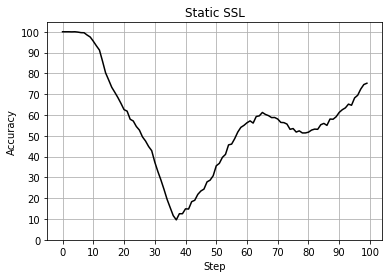

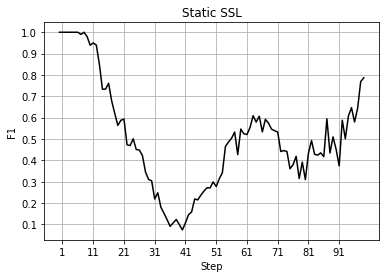




METHOD: Sliding lp as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Execution time:  5.96210721434929
Average MCC:  0.865074074005
Average macro-F1: 0.9245536828912693
Average Accuracy:  92.5131
Standard Deviation:  10.017867008
Variance:  100.35765939


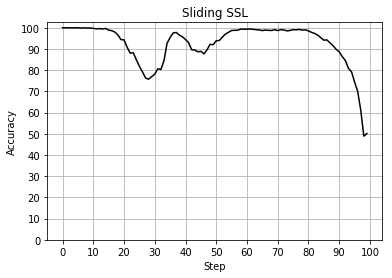

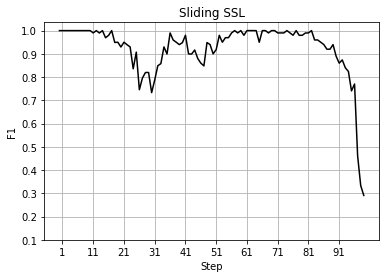




METHOD: Incremental lp as classifier
Execution time:  220.57575771941657
Average MCC:  0.131236930589
Average macro-F1: 0.4916384428640496
Average Accuracy:  57.4518
Standard Deviation:  24.5596149962
Variance:  603.17468876


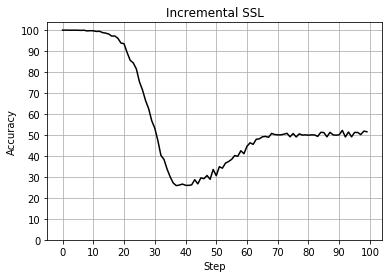

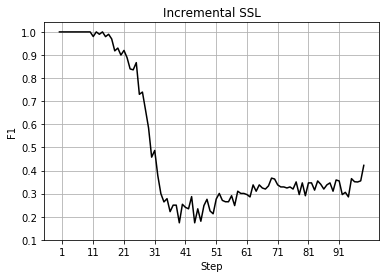




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  40.63369359055045
Average MCC:  0.894326509616
Average macro-F1: 0.9461865985294965
Average Accuracy:  94.3765
Standard Deviation:  5.91080237785
Variance:  34.93758475


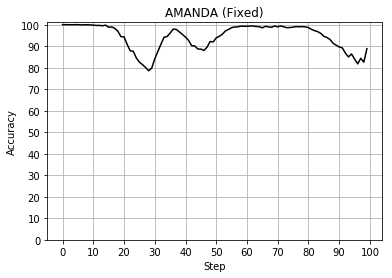

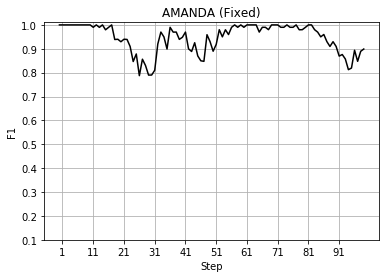




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  41.20346335225287
Average MCC:  0.888847930657
Average macro-F1: 0.9426749697962599
Average Accuracy:  93.9023
Standard Deviation:  6.6331517177
Variance:  43.99870171


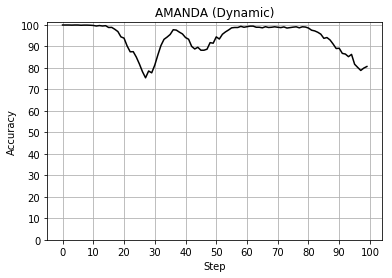

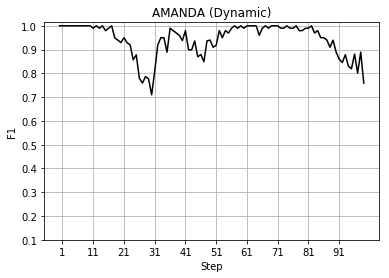




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  88.06723682042883
Average MCC:  0.856540572242
Average macro-F1: 0.9217666253283846
Average Accuracy:  92.2394
Standard Deviation:  9.44987183194
Variance:  89.30007764


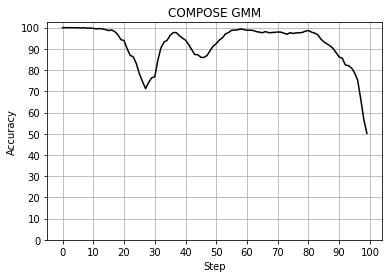

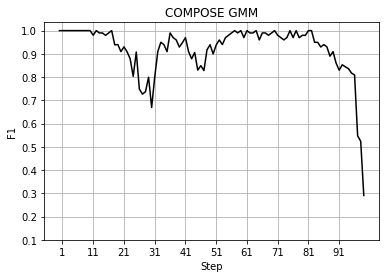




Method: Level IW
Execution time:  88.06723682042883
Average MCC:  0.0117367424575
Average macro-F1: 0.5032561185851022
Average Accuracy:  62.834737
Standard Deviation:  20.2410123764
Variance:  409.69858202


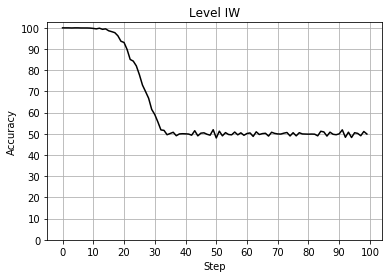

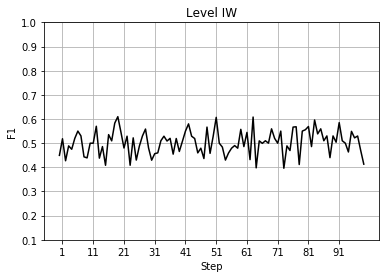

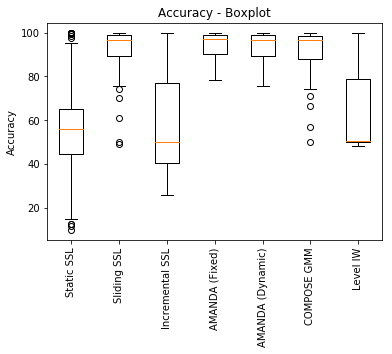

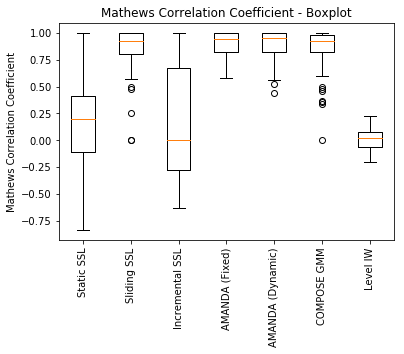

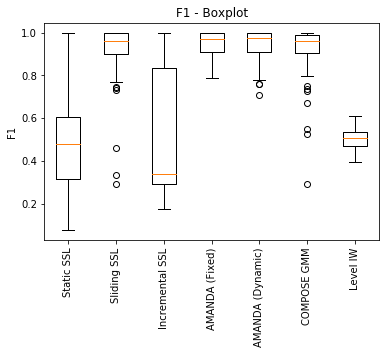

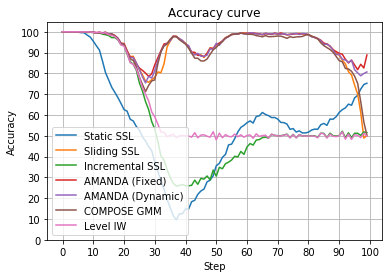

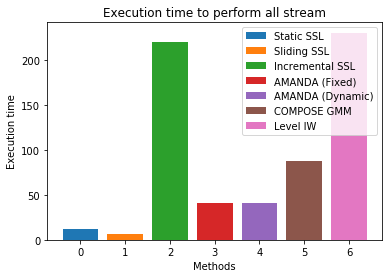

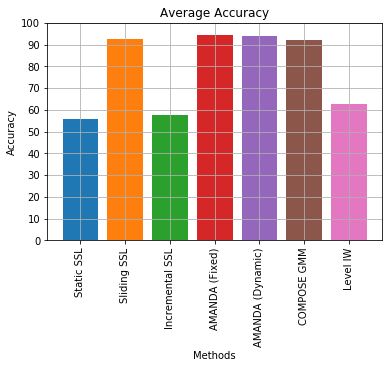

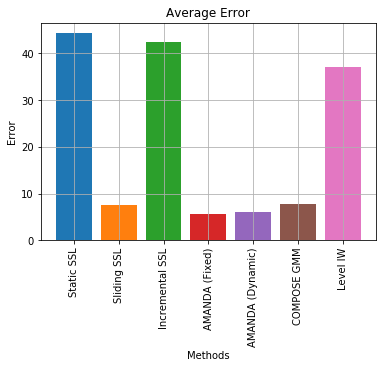

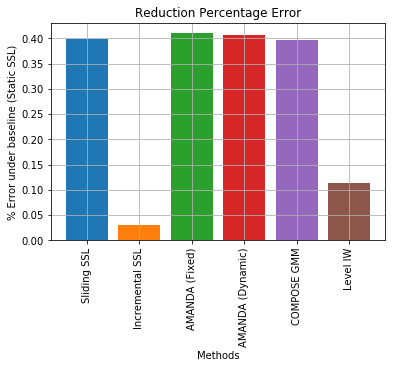

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadUG_2C_3D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 9, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 9, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 9, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 9, 0.85, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 12, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 9)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'UG_2C_3D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()